# Introduction

Notebook to aggregate the running of models in the context of traceability between **features** and **bug reports**.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import feat_br_strat_runner

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

Feat_BR Volunteers Matrix shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [3]:
evals_df_4.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,eval_df,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.0,1.0,Bug_Number 1248267 1248268 125...
1,lsi,top_1_cosine_0.1,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.1,1.0,Bug_Number 1248267 1248268 125...
2,lsi,top_1_cosine_0.2,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.2,1.0,Bug_Number 1248267 1248268 125...
3,lsi,top_1_cosine_0.3,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.3,1.0,Bug_Number 1248267 1248268 125...
4,lsi,top_1_cosine_0.4,28.57,26.18,26.62,precision recall fscore Bug_Nu...,0.4,1.0,Bug_Number 1248267 1248268 125...


In [4]:
from modules.utils import aux_functions

aux_functions.highlight_df( evals_df_4[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

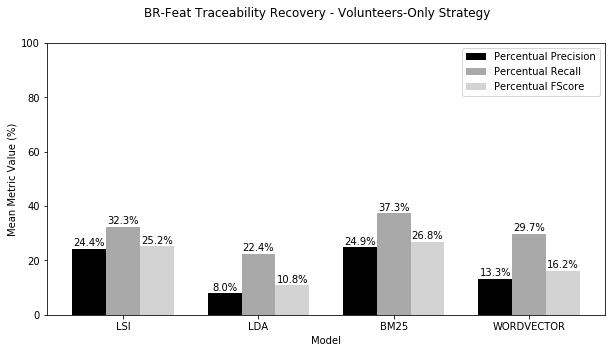

In [6]:
evaluator_4.plot_evaluations_3(evals_df_4, title='BR-Feat Traceability Recovery - Volunteers-Only Strategy')

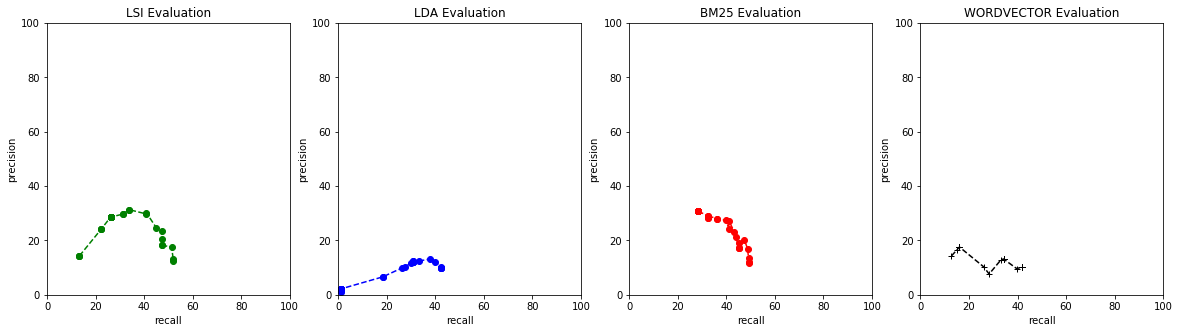

In [7]:
evaluator_4.plot_evaluations_4(evals_df_4)

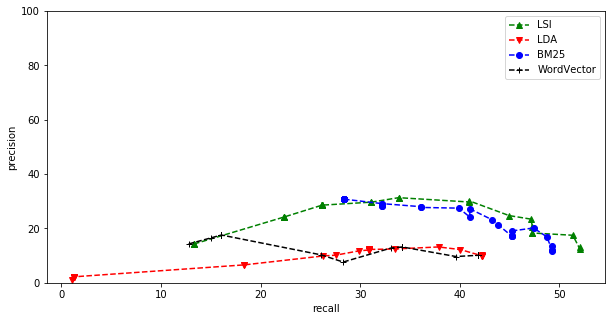

In [8]:
evaluator_4.plot_evaluations_5(evals_df_4)

### Retrieved Traces - Similarity Threshold 0.0

In [23]:
import pandas as pd

models = ['lsi','lda','bm25','wordvector']
tops = [1,3,5]
cosines = [0.0]

oracle = vol_strat_runner.get_oracle()

final_df = pd.DataFrame(columns=['top','sim_thresh','model','retrieved','TP_amount','FP_amount','FN_amount','TP','FP','FN','precision','recall'])

for m in models:
    for top in tops:
        for cos in cosines:
            df = evals_df_4[(evals_df_4.ref_name == 'top_{}_cosine_{}'.format(top,cos)) & (evals_df_4.model == m)].iloc[0,:]
            trace_links = df.trace_links_df
            
            tp = aux_functions.get_true_positives(oracle_df=oracle, output_df=trace_links)
            fp = aux_functions.get_false_positives(oracle_df=oracle, output_df=trace_links)
            fn = aux_functions.get_false_negatives(oracle_df=oracle, output_df=trace_links)
            
            ans = {'top':top, 
                   'sim_thresh':cos, 
                   'model':m,
                   'retrieved': sum([trace_links[col].sum() for col in trace_links.columns]),
                   'precision': df.perc_precision,
                   'recall': df.perc_recall,
                   'TP':tp,
                   'TP_amount':len(tp),
                   'FP':fp,
                   'FP_amount':len(fp),
                   'FN':fn,
                   'FN_amount':len(fn)} 
                        
            final_df = final_df.append(ans, ignore_index=True)

final_df.sort_values(by='retrieved', inplace=True)
final_df.head(50)

,top,sim_thresh,model,retrieved,TP_amount,FP_amount,FN_amount,TP,FP,FN,precision,recall
0,1,0.0,lsi,91,26,65,67,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(indicator_device_perm, 1319433), (webm_eme, ...","{(new_awesome_bar, 1408361), (browser_customiz...",28.57,26.18
3,1,0.0,lda,91,2,89,91,"{(webgl_comp, 1312018), (context_menu, 1365887)}","{(pdf_viewer, 1302468), (webgl_comp, 1289240),...","{(new_awesome_bar, 1339497), (context_menu, 12...",2.20,1.24
6,1,0.0,bm25,91,28,63,65,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(indicator_device_perm, 1319433), (webm_eme, ...","{(browser_customization, 1279140), (new_awesom...",30.77,28.38
9,1,0.0,wordvector,91,16,75,77,"{(new_awesome_bar, 1408361), (context_menu, 12...","{(windows_child_mode, 1313290), (context_menu,...","{(new_awesome_bar, 1339497), (pdf_viewer, 1365...",17.58,16.07
1,3,0.0,lsi,273,50,223,43,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(tts_in_desktop, 1294733), (w10_comp, 1277937...","{(browser_customization, 1279140), (pointer_lo...",18.32,47.31
4,3,0.0,lda,273,33,240,60,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(w10_comp, 1285328), (w10_comp, 1353831), (vi...","{(browser_customization, 1279140), (pointer_lo...",12.09,30.93
7,3,0.0,bm25,273,47,226,46,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(context_menu, 1311998), (flash_support, 1365...","{(browser_customization, 1279140), (pointer_lo...",17.22,45.22
10,3,0.0,wordvector,273,36,237,57,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(context_menu, 1311998), (windows_child_mode,...","{(browser_customization, 1279140), (pointer_lo...",13.19,34.23
2,5,0.0,lsi,455,57,398,36,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(context_menu, 1311998), (indicator_device_pe...","{(browser_customization, 1279140), (pointer_lo...",12.53,52.06
5,5,0.0,lda,455,45,410,48,"{(new_awesome_bar, 1339497), (new_awesome_bar,...","{(context_menu, 1311998), (w10_comp, 1296322),...","{(browser_customization, 1279140), (pointer_lo...",9.89,42.28


### True Traces

In [31]:
oracle_true_traces = set()

for idx,row in oracle.iterrows():
    for col in oracle.columns:
        if oracle.at[idx, col] == 1:
            oracle_true_traces.add((idx,col))

print('len(oracle_true_traces): {}'.format(len(oracle_true_traces)))

len(oracle_true_traces): 93


### Traces Not Captured by Any Technique

In [46]:
def get_captured_traces_union(top_value):
    bm25_true_traces = final_df[(final_df.model == 'bm25') & (final_df.top == top_value)].iloc[0,:].TP
    lsi_true_traces = final_df[(final_df.model == 'lsi') & (final_df.top == top_value)].iloc[0,:].TP
    lda_true_traces = final_df[(final_df.model == 'lda') & (final_df.top == top_value)].iloc[0,:].TP
    wordvector_true_traces = final_df[(final_df.model == 'wordvector') & (final_df.top == top_value)].iloc[0,:].TP
    
    return(bm25_true_traces | lsi_true_traces | lda_true_traces | wordvector_true_traces)

#### TOP 1

In [47]:
all_captured_traces = get_captured_traces_union(top_value=1)
not_captured_traces = oracle_true_traces - all_captured_traces

print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

len(not_captured_traces): 59
percent not_captured_traces: 59/93 * 100 : 63.44%


#### TOP 3

In [48]:
all_captured_traces = get_captured_traces_union(top_value=3)
not_captured_traces = oracle_true_traces - all_captured_traces

print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

len(not_captured_traces): 32
percent not_captured_traces: 32/93 * 100 : 34.41%


#### TOP 5

In [49]:
all_captured_traces = get_captured_traces_union(top_value=5)
not_captured_traces = oracle_true_traces - all_captured_traces

print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

len(not_captured_traces): 23
percent not_captured_traces: 23/93 * 100 : 24.73%


### Traces Captured by Every Technique

In [51]:
def get_captured_traces_intersec(top_value):
    bm25_true_traces = final_df[(final_df.model == 'bm25') & (final_df.top == top_value)].iloc[0,:].TP
    lsi_true_traces = final_df[(final_df.model == 'lsi') & (final_df.top == top_value)].iloc[0,:].TP
    lda_true_traces = final_df[(final_df.model == 'lda') & (final_df.top == top_value)].iloc[0,:].TP
    wordvector_true_traces = final_df[(final_df.model == 'wordvector') & (final_df.top == top_value)].iloc[0,:].TP
    
    return(bm25_true_traces & lsi_true_traces & lda_true_traces & wordvector_true_traces)

#### TOP 1

In [52]:
traces_captured_by_all = get_captured_traces_intersec(1)

print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/93 * 100 : 0.0%


#### TOP 3

In [53]:
traces_captured_by_all = get_captured_traces_intersec(3)

print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

len(traces_captured_by_all): 24
percent traces_captured_by_all: 24/93 * 100 : 25.81%


#### TOP 5

In [54]:
traces_captured_by_all = get_captured_traces_intersec(5)

print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

len(traces_captured_by_all): 34
percent traces_captured_by_all: 34/93 * 100 : 36.56%


### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-Feat Traceability Recovery - Exp-Vol Union Strategy')

### Delete Variables

## Intersec Strategy

In [ ]:
exp_vol_intersec_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_2.head()

### Plots

In [ ]:
evaluator_2.plot_evaluations_3(evals_df_2, title='BR-Feat Traceability Recovery - Exp-Vol Intersec Strategy')

In [ ]:
evaluator_2.plot_evaluations_4(evals_df_2)

In [ ]:
evaluator_2.plot_evaluations_5(evals_df_2)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3, title='BR-Feat Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3)

### Delete Variables